## Data Cleaning & Preprocessing:

### Cleaning:

1.  Removed Junk values from Age column. The Age column had junk values like “R”, which was removed and replaced with 0 instead.
2.  Removed rows from data set where age is 0
3.  Replaced null values with zero
4.  Type-casted variables to type “category” form int64



### Preprocessing:

#### Added new column named “followUp_req”
We added a new feature that we created in the data set. We observed that, the absenteesim hours had been repeated several times for the same ID, that is the same employee, more often than not for the same month, consecutively. This made us think that, certain reasons for absence had an impact on this repetitive nature. We confirmed this by closely inspecting the data set description, and seeing that the reasons for absence had been bifurcated into two subsets – one requiring follow ups and another set of reasons that do not require follow up. We wanted to capture this nature of the data within the data set, and feed this information to the machine learning models. Hence we created this new feature “followUp_req”.

This new column has binary categorical values, depending on the “Reason for Absence” column. In this feature, (followUp_req), the value is 1, if the corresponding reason for absence for this row belongs to categories 1-21, for which a follow up appointment with medical professionals is necessary. On the other hand, if the Reason for absence for the corresponding column falls between categories 22-28, that is, the conditions that do not require a follow up appointment, then the column followUp_req is 0.

#### Added categorical target column 
We added a new target column that was categorical in nature. We divided the original target column values into different groups, based on the number of hours of absenteeism for that corresponding row. The different buckets and their corresponding groups are given in the table below. 
 
-  Absenteeism time in hours --- Group
    - 0 Hours --- Group 0
    - 1 Hour --- Group 1
    - 2 Hours --- Group 2
    - 3 Hours --- Group 3
    - 4-7 Hours --- Group 4
    - 8 Hours --- Group 5
    - Above 9 Hours --- Group 6

A new dataset was created with only the categorical target column. In our analysis, we used both continuous and categorical target columns separately in two different datasets.

#### Scaling and Feature Reduction
Depending on the requirement machine learning model under consideration, we scaled the data in order to normalize all the values, conducted principal component analysis and linear discriminant analysis to reduce the number of features. We did not perform scaling and feature reduction for all the machine learning models. We only performed these for machine learning models that required this kind of preprocessing to be done prior to the application of the algorithm on to the data set. 


In [ ]:
import pandas as pd
import numpy as np
import random
import pylab as pl

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# scikit learning package
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score, make_scorer,classification_report,roc_curve, auc
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler,OneHotEncoder,scale
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from scipy.stats.mstats import mquantiles
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [12]:
# read csv file
path = 'Absenteeism_at_work_train.csv'
data_530 = pd.read_csv(path, decimal=",")

## DATA CLEANUP

In [13]:
# investigate the data
data_530.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
ID                                 666 non-null int64
Reason for absence                 666 non-null int64
Month of absence                   666 non-null int64
Day of the week                    666 non-null int64
Seasons                            666 non-null int64
Transportation expense             666 non-null int64
Distance from Residence to Work    666 non-null int64
Service time                       666 non-null int64
Age                                666 non-null object
Work load Average/day              666 non-null float64
Hit target                         665 non-null float64
Disciplinary failure               666 non-null int64
Education                          666 non-null int64
Son                                666 non-null int64
Social drinker                     666 non-null int64
Social smoker                      666 non-null int64
Pet                       

In [14]:
data_530.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90.0,172,30,2


In [15]:
# age column have junk values

data_530.Age = data_530.Age.replace("R", 0)

data_530['Age'] =data_530['Age'].astype(str).astype('int64')

# replacing rows with age 0
#data_530.Age = data_530.Age.replace(0, int(data_530['Age'].mean()))

data_530 = data_530[data_530['Age'] != 0]

In [16]:
# Null values in dataset
data_530.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         1
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             2
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [17]:
# replace null values with respective column mean

data_530 =data_530.fillna(0)

In [18]:
#type conversion
data_530['Age'] =data_530['Age'].astype('int64')

data_530.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,17.688253,19.459337,6.451807,3.893072,2.552711,222.650602,30.311747,12.694277,36.406627,272.605247,...,0.054217,1.246988,1.028614,0.584337,0.067771,0.686747,78.978916,171.868976,26.817771,6.756024
std,11.075530,8.352608,3.573081,1.425584,1.136369,66.660267,14.888751,4.355080,6.365941,42.851846,...,0.226616,0.618340,1.125903,0.493207,0.251542,1.169525,13.343456,5.938549,4.235338,12.685099
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [19]:
# cross verify for null values
data_530.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [20]:
# adding new column named 'followUp_req' based on whether reason for absence required follow up or not
data_530['followUp_req'] = np.where(data_530['Reason for absence'] <= 21, 1, 0)

# add categorical target column as per project requirement

data_530['Absenteeism categories'] = np.where(data_530['Absenteeism time in hours'] == 0, "Group 0", 
                                              np.where(data_530['Absenteeism time in hours'] == 1, "Group 1",
                                                      np.where(data_530['Absenteeism time in hours'] == 2, "Group 2",
                                                              np.where(data_530['Absenteeism time in hours'] == 3, "Group 3",
                                                                      np.where((data_530['Absenteeism time in hours'] >= 4)&(data_530['Absenteeism time in hours'] <= 7), "Group 4",
                                                                               np.where(data_530['Absenteeism time in hours'] == 8, "Group 5",
                                                                                       np.where(data_530['Absenteeism time in hours'] >= 9, "Group 6",0))
                                                                              )))))

In [21]:
# checking for Absenteeism categorie groups 
a= data_530['Absenteeism categories'].unique()
print(sorted(a))

['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']


In [22]:
# formatting to proper data type
data_530['Reason for absence'] = data_530['Reason for absence'].astype('category')
data_530['Month of absence'] = data_530['Month of absence'].astype('category')
data_530['Day of the week'] = data_530['Day of the week'].astype('category')
data_530['Seasons'] = data_530['Seasons'].astype('category')
data_530['Disciplinary failure'] = data_530['Disciplinary failure'].astype('category')
data_530['Education'] = data_530['Education'].astype('category')
data_530['Social drinker'] = data_530['Social drinker'].astype('category')
data_530['Social smoker'] = data_530['Social smoker'].astype('category')
data_530['Pet'] = data_530['Pet'].astype('category')
data_530['followUp_req'] = data_530['followUp_req'].astype('category')
data_530['Absenteeism categories'] = data_530['Absenteeism categories'].astype('category')
data_530.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 665
Data columns (total 23 columns):
ID                                 664 non-null int64
Reason for absence                 664 non-null category
Month of absence                   664 non-null category
Day of the week                    664 non-null category
Seasons                            664 non-null category
Transportation expense             664 non-null int64
Distance from Residence to Work    664 non-null int64
Service time                       664 non-null int64
Age                                664 non-null int64
Work load Average/day              664 non-null float64
Hit target                         664 non-null float64
Disciplinary failure               664 non-null category
Education                          664 non-null category
Son                                664 non-null int64
Social drinker                     664 non-null category
Social smoker                      664 non-null category
Pet

We can observe outliers in transportation expense


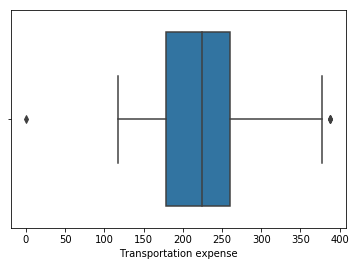

In [23]:
#observe outliers in transportation expense
print('We can observe outliers in transportation expense')
sns.boxplot(data_530['Transportation expense'])

no outliers


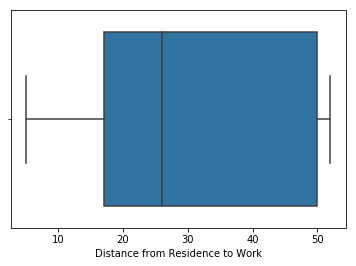

In [24]:
sns.boxplot(data_530['Distance from Residence to Work'])
print('no outliers')

We can observe outliers in service time variable


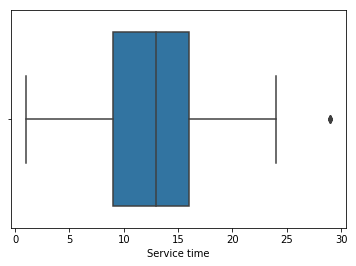

In [25]:
sns.boxplot(data_530['Service time'])
print('We can observe outliers in service time variable')

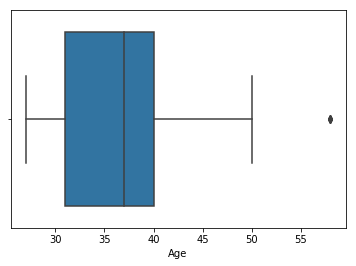

In [26]:
sns.boxplot(data_530['Age'])

We can observe outliers in Work load Average/day


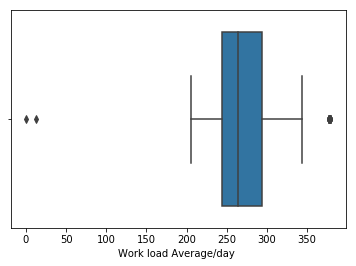

In [27]:
sns.boxplot(data_530['Work load Average/day '])

print('We can observe outliers in Work load Average/day')

We can observe outlier in Hit target


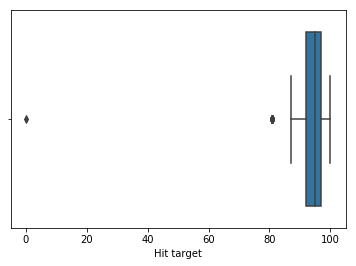

In [28]:
sns.boxplot(data_530['Hit target'])
print('We can observe outlier in Hit target')

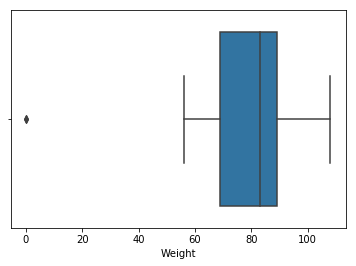

In [29]:
sns.boxplot(data_530['Weight'])

We can observe outliers in Height variable


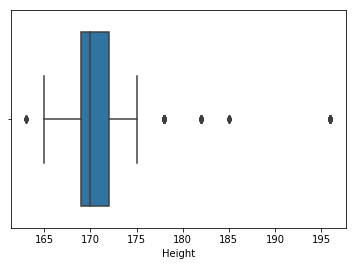

In [30]:
sns.boxplot(data_530['Height'])
print('We can observe outliers in Height variable')

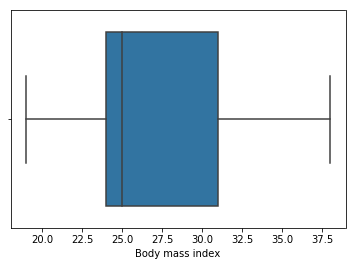

In [31]:
sns.boxplot(data_530['Body mass index'])

In [33]:
# store two datasets, one for continous and other categorical
dataset_continuous = data_530.drop('Absenteeism categories', axis=1)
dataset_categorical = data_530.drop('Absenteeism time in hours',axis=1)

print(dataset_continuous.shape)
print(dataset_categorical.shape)

(664, 22)
(664, 22)


In [34]:
# write the taining data to file

dataset_continuous.to_csv('cleanDataset_continuousTarget.csv',index=False)
dataset_categorical.to_csv('cleanDataset_categoricalTarget.csv',index=False)

In [35]:
# get the test dataset
test_path = 'Absenteeism_at_work_test.csv'
mydata_test = pd.read_csv(test_path, decimal=",")

In [36]:
# preprocess the test dataset
# adding new column named 'followUp_req' based on whether reason for absence required follow up or not
mydata_test['followUp_req'] = np.where(mydata_test['Reason for absence'] <= 21, 1, 0)

# add categorical target column as per project requirement

mydata_test['Absenteeism categories'] = np.where(mydata_test['Absenteeism time in hours'] == 0, "Group 0", 
                                              np.where(mydata_test['Absenteeism time in hours'] == 1, "Group 1",
                                                      np.where(mydata_test['Absenteeism time in hours'] == 2, "Group 2",
                                                              np.where(mydata_test['Absenteeism time in hours'] == 3, "Group 3",
                                                                      np.where((mydata_test['Absenteeism time in hours'] >= 4)&(mydata_test['Absenteeism time in hours'] <= 7), "Group 4",
                                                                               np.where(mydata_test['Absenteeism time in hours'] == 8, "Group 5",
                                                                                       np.where(mydata_test['Absenteeism time in hours'] >= 9, "Group 6",0))
                                                                              )))))

mydata_test['Reason for absence'] = mydata_test['Reason for absence'].astype('category').cat.codes
mydata_test['Month of absence'] = mydata_test['Month of absence'].astype('category').cat.codes
mydata_test['Day of the week'] = mydata_test['Day of the week'].astype('category').cat.codes
mydata_test['Seasons'] = mydata_test['Seasons'].astype('category').cat.codes
mydata_test['Disciplinary failure'] = mydata_test['Disciplinary failure'].astype('category').cat.codes
mydata_test['Education'] = mydata_test['Education'].astype('category').cat.codes
mydata_test['Social drinker'] = mydata_test['Social drinker'].astype('category').cat.codes
mydata_test['Social smoker'] = mydata_test['Social smoker'].astype('category').cat.codes
mydata_test['Pet'] = mydata_test['Pet'].astype('category').cat.codes
mydata_test['followUp_req'] = mydata_test['followUp_req'].astype('category').cat.codes
mydata_test['Absenteeism categories'] = mydata_test['Absenteeism categories'].astype('category').cat.codes